<a href="https://colab.research.google.com/github/tajain07/neural-network-playground/blob/master/Autoencoder_using_Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

In [0]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True,
                            download=True, transform=transform)

test_data = datasets.MNIST(root='data', train=True, 
                           download=True, transform=transform)

In [0]:
num_workers = 0
batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                           num_workers=num_workers)

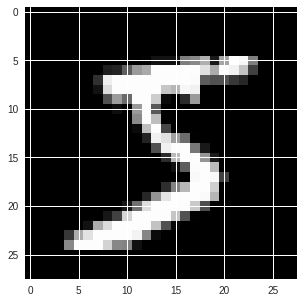

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
    super(ConvAutoencoder, self).__init__()
    
    self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
    self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    
    ## decoder layers ##
    ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
    self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
    self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    
    x = F.relu(self.t_conv1(x))
    x = torch.sigmoid(self.t_conv2(x))
    
    return x

  
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)


In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
n_epochs = 30

for epoch in range(1, n_epochs+1):
  
  train_loss = 0.0
  
  for data in train_loader:
    images, _ = data
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, images)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*images.size(0)
    
  train_loss = train_loss/len(train_loader)
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.516132
Epoch: 2 	Training Loss: 0.370158
Epoch: 3 	Training Loss: 0.320721
Epoch: 4 	Training Loss: 0.295772
Epoch: 5 	Training Loss: 0.280513
Epoch: 6 	Training Loss: 0.270822
Epoch: 7 	Training Loss: 0.264289
Epoch: 8 	Training Loss: 0.259606
Epoch: 9 	Training Loss: 0.256126
Epoch: 10 	Training Loss: 0.253067
Epoch: 11 	Training Loss: 0.248795
Epoch: 12 	Training Loss: 0.245121
Epoch: 13 	Training Loss: 0.242466
Epoch: 14 	Training Loss: 0.240230
Epoch: 15 	Training Loss: 0.237998
Epoch: 16 	Training Loss: 0.235900
Epoch: 17 	Training Loss: 0.234036
Epoch: 18 	Training Loss: 0.232212
Epoch: 19 	Training Loss: 0.230371
Epoch: 20 	Training Loss: 0.228172
Epoch: 21 	Training Loss: 0.226264
Epoch: 22 	Training Loss: 0.224840
Epoch: 23 	Training Loss: 0.223769
Epoch: 24 	Training Loss: 0.222929
Epoch: 25 	Training Loss: 0.222263
Epoch: 26 	Training Loss: 0.221707
Epoch: 27 	Training Loss: 0.221223
Epoch: 28 	Training Loss: 0.220782
Epoch: 29 	Training Loss: 0.2

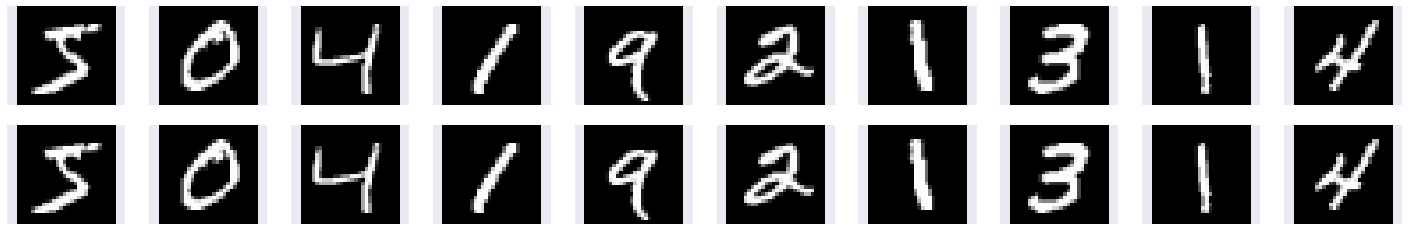

In [16]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

output = model(images)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for image, row in zip([images, output], axes):
  for img, ax in zip(images, row):
    ax.imshow(np.squeeze(img), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    